### **🧭 Stage 1 → Lesson 3: Pandas DataFrame (Basics to Professional-Level)**

### **🎯 Objective**

By the end of this lesson, you’ll:
- Understand DataFrame internals (rows, columns, index)
- Create DataFrames from various sources (list, dict, NumPy, CSV)
- Explore shape, info, and summary statistics
- Select rows & columns efficiently
-  Perform basic mutations (add/drop/rename)

**🧱 What is a DataFrame?**
- A DataFrame is a two-dimensional labeled data structure with columns of potentially different types.
Think of it as an Excel sheet or SQL table in memory.


**Internally:**

- Each column is a Series
- Rows are aligned on a shared index

**🧩 Creating DataFrames**
- From a Dictionary of Lists 

In [31]:
# Importing the pandas library as pd
import pandas as pd

# Defining a dictionary with sample data: Names, Ages, and Cities
data = {
    'Name': ['Dhiraj', 'Pooja', 'Kevin', 'Ravi'],  # List of names
    'Age': [36, 34, 22, 33],  # List of ages corresponding to the names
    'City': ['DL', 'MH', 'US', 'PUNE']  # List of cities corresponding to the names
}

# Creating a DataFrame from the dictionary
df = pd.DataFrame(data)

# Printing the DataFrame to display the data in a tabular format
print(df)


     Name  Age  City
0  Dhiraj   36    DL
1   Pooja   34    MH
2   Kevin   22    US
3    Ravi   33  PUNE


**From a List of Dictionaries**

In [32]:
# Creating a list of dictionaries, where each dictionary represents a record
records = [
    {'Name':'Dhiraj','Age':36,'City':'DL'},      # First record: Name, Age, City
    {'Name':'Pooja','Age':25,'City':'MH'},      # Second record: Name, Age, City
    {'Name':'Kevin','Age':38,'Country':'US'},   # Third record: Name, Age, but Country instead of City
    {'Name':'Ravi','Age':33,'City':'Pune'}      # Fourth record: Name, Age, City
]

# Creating a DataFrame from the list of dictionaries
df = pd.DataFrame(records)

# Printing the DataFrame to display the tabular structure of the data
print(df)

     Name  Age  City Country
0  Dhiraj   36    DL     NaN
1   Pooja   25    MH     NaN
2   Kevin   38   NaN      US
3    Ravi   33  Pune     NaN


**From NumPy Array**

In [33]:
# Importing the numpy library as np for working with arrays
import numpy as np

# Creating a 2D numpy array (1 row, 4 columns)
arr = np.array([[36, 34, 12, 10]])

# Transposing the array to make it 4 rows and 1 column, then creating a DataFrame
df = pd.DataFrame(arr.T, columns=['Age'])

# Printing the DataFrame to display the result
print(df)

   Age
0   36
1   34
2   12
3   10


**From CSV or Excel**

In [34]:
# Importing pandas as pd to work with CSV and Excel files
import pandas as pd

# Reading a CSV file into a DataFrame
df_csv = pd.read_csv(r"C:\Users\dhira\Desktop\python-mastery\pandas\dataset\raw\messy_people.csv")

# Reading an Excel file into a DataFrame
df_xlx = pd.read_excel(r"C:\Users\dhira\Desktop\python-mastery\pandas\dataset\raw\people_basic_data.xlsx")

# Converting the read CSV and Excel files into DataFrames (optional since they are already DataFrames)
df_csv = pd.DataFrame(df_csv)
df_xlx = pd.DataFrame(df_xlx)

# Printing the DataFrame created from the CSV file
print("Print CSV DataFrame\n", df_csv)

# Printing the DataFrame created from the Excel file
print("\nPrint Excel DataFrame\n")
print(df_xlx)


Print CSV DataFrame
         name   age     city  salary
0      aRjun  29.0   Delhi    72000
1     DHIRAJ  36.0    Noida  150000
2    pooja    32.5   mumbai   98000

Print Excel DataFrame

       Name  Age       City  Salary_INR
0     Aarav   23     Mumbai      115059
1    Vivaan   50  Ahmedabad       93035
2    Aditya   46  Ahmedabad       61033
3    Vihaan   37       Pune      187550
4     Arjun   37      Delhi      162866
5       Sai   54      Noida      139457
6   Krishna   23  Hyderabad       98410
7    Ishaan   47    Kolkata      169869
8    Pranav   28     Jaipur      122722
9     Rohit   23  Ahmedabad      105380
10   Ananya   41  Ahmedabad      106578
11     Diya   59     Mumbai       68630
12     Isha   49       Pune       45663
13   Aadhya   50  Hyderabad      124279
14     Myra   48  Hyderabad      180941
15    Pooja   51      Delhi       40848
16    Vanya   40    Chennai      175909
17    Navya   25     Mumbai      170697
18    Meera   53  Ahmedabad       77049
19   Aarohi

**🧩 Inspecting Structure and Data**


| **Function**      | **Purpose**                                      |
|-------------------|--------------------------------------------------|
| `df.head(n)`      | First n rows (default 5)                         |
| `df.tail(n)`      | Last n rows                                      |
| `df.shape`        | (Total rows, columns)                            |
| `df.info()`       | Column types + non-null count                    |
| `df.describe()`   | Statistical summary of numeric columns           |
| `df.columns`      | List of column names                             |
| `df.index`        | Current row index                                |


In [35]:
# Displaying general information about the DataFrame created from the CSV file
df_csv.info()

# Displaying basic statistics (like mean, count, std, min, 25%, 50%, 75%, max) for the DataFrame created from the Excel file
df_xlx.describe()

# Printing the column names of the CSV DataFrame
print(df_csv.columns)

# Printing the index (row labels) of the CSV DataFrame
print(df_xlx.index)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    3 non-null      object 
 1   age     3 non-null      float64
 2   city    3 non-null      object 
 3   salary  3 non-null      int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 228.0+ bytes
Index(['name', 'age', 'city', 'salary'], dtype='object')
RangeIndex(start=0, stop=20, step=1)


In [36]:
# Importing pandas to work with DataFrames
import pandas as pd

# Creating a DataFrame with custom data and custom row indices
df_lst = pd.DataFrame({
    'A': [1, 2, 3],  # Values for column 'A'
    'B': [4, 5, 6]   # Values for column 'B'
}, index=['a', 'b', 'c'])  # Custom row indices as strings

# Printing the DataFrame to display the result
print(df_lst)

   A  B
a  1  4
b  2  5
c  3  6


**🧩 Selecting Columns and Rows**
- Select Single Column

In [37]:
print(df_xlx.head())

     Name  Age       City  Salary_INR
0   Aarav   23     Mumbai      115059
1  Vivaan   50  Ahmedabad       93035
2  Aditya   46  Ahmedabad       61033
3  Vihaan   37       Pune      187550
4   Arjun   37      Delhi      162866


In [38]:
# Accessing the 'Name' column from the DataFrame 'df_xlx'
df_xlx['Name']


0       Aarav
1      Vivaan
2      Aditya
3      Vihaan
4       Arjun
5         Sai
6     Krishna
7      Ishaan
8      Pranav
9       Rohit
10     Ananya
11       Diya
12       Isha
13     Aadhya
14       Myra
15      Pooja
16      Vanya
17      Navya
18      Meera
19     Aarohi
Name: Name, dtype: object

**🔹 Select Multiple Columns**

In [39]:
# Selecting the 'Name' and 'City' columns from the DataFrame 'df_xlx'
# This will return a new DataFrame that contains only these two columns
df_xlx[['Name', 'City']]

,Name,City
0,Aarav,Mumbai
1,Vivaan,Ahmedabad
2,Aditya,Ahmedabad
3,Vihaan,Pune
4,Arjun,Delhi
5,Sai,Noida
6,Krishna,Hyderabad
7,Ishaan,Kolkata
8,Pranav,Jaipur
9,Rohit,Ahmedabad


**🔹 Select Rows by Position**
- Integer-based Indexing

In [40]:
# Accessing the first row of the DataFrame using iloc (index-based selection)
# df.iloc[0] selects the row at position 0 (the first row)
df_xlx.iloc[0]  # First row

Name           Aarav
Age               23
City          Mumbai
Salary_INR    115059
Name: 0, dtype: object

In [41]:
# Accessing the first 3 rows of the DataFrame using iloc
# df.iloc[0:3] selects rows at position 0, 1, and 2 (but NOT row 3, as slicing is exclusive of the end index)
df_xlx.iloc[0:3]  # First 3 rows

,Name,Age,City,Salary_INR
0,Aarav,23,Mumbai,115059
1,Vivaan,50,Ahmedabad,93035
2,Aditya,46,Ahmedabad,61033


**🔹 Select Rows by Label**
- Label-based Indexing

In [42]:
# Accessing the row with index label '0'
df_xlx.loc[0]

Name           Aarav
Age               23
City          Mumbai
Salary_INR    115059
Name: 0, dtype: object

**🔹 Mixed Selection**

In [43]:
print(df_xlx.head())

     Name  Age       City  Salary_INR
0   Aarav   23     Mumbai      115059
1  Vivaan   50  Ahmedabad       93035
2  Aditya   46  Ahmedabad       61033
3  Vihaan   37       Pune      187550
4   Arjun   37      Delhi      162866


In [44]:
# Accessing a single value in the DataFrame using `.loc[]`
# .loc[] is label-based indexing, meaning we select data using index labels and column labels.

# df_xlx.loc[0, "Name"] is used to access the value in the 'Name' column of the row where the index is 0.
# It uses the index label `0` (not position) to find the row, and selects the value in the 'Name' column for that row.
print(df_xlx.loc[0, "Name"])  # This will print the 'Name' value for the row with index 0.

Aarav


In [45]:
# Accessing multiple rows and columns in the DataFrame using `.loc[]` with slicing

# df_xlx.loc[0:3, ['Name', 'City', 'Age']] is used to select a range of rows and specific columns.
# - `0:3` selects rows where the index labels are 0, 1, 2, and 3. 
#   (Note: In .loc[], the slicing is inclusive, so row 3 is included).
# - `['Name', 'City', 'Age']` specifies the list of columns we want to select.
# This will give us a DataFrame with rows 0 through 3, and only the columns 'Name', 'City', and 'Age'.
print(df_xlx.loc[0:3, ['Name', 'City', 'Age']])


     Name       City  Age
0   Aarav     Mumbai   23
1  Vivaan  Ahmedabad   50
2  Aditya  Ahmedabad   46
3  Vihaan       Pune   37


**Example with a Custom Index**

In [46]:
# Creating a DataFrame with a custom index
df_custom_index = pd.DataFrame({
    'Name':['Alice','Bob','Charlie'],
    'Age':[25, 30 ,35],
    'City': ['NY','LA','CH']
}, index=['a','b','c'])

print("Original DF\n",df_custom_index)

# Accessing by label (loc)

print("\nprint by lable\n",df_custom_index.loc['a'])  # Accessing row where index label is 'a'

# Accessing by position (iloc)
print("\nccessing the first row by position:>\n",df_custom_index.iloc[0])  # Accessing the first row by position (0th row)


Original DF
       Name  Age City
a    Alice   25   NY
b      Bob   30   LA
c  Charlie   35   CH

print by lable
 Name    Alice
Age        25
City       NY
Name: a, dtype: object

ccessing the first row by position:>
 Name    Alice
Age        25
City       NY
Name: a, dtype: object


**🧩 Add, Update and Delete Columns**

In [47]:
print(df_xlx.head())

     Name  Age       City  Salary_INR
0   Aarav   23     Mumbai      115059
1  Vivaan   50  Ahmedabad       93035
2  Aditya   46  Ahmedabad       61033
3  Vihaan   37       Pune      187550
4   Arjun   37      Delhi      162866


In [48]:
# Adding a new column "Country" with the value "India" for every row in the DataFrame
df_xlx["Country"] = "India"

# Creating a new column "Variable" based on the condition applied to the "Salary_INR" column
# Using np.where() to create a conditional column
# If Salary_INR is less than 70,000, apply 10% of Salary_INR as the value in "Variable"
# If Salary_INR is less than 100,000 but greater than or equal to 70,000, apply 12% of Salary_INR
# If Salary_INR is greater than or equal to 100,000, apply 15% of Salary_INR
df_xlx["Variable"] = np.where(
    df_xlx["Salary_INR"] < 70000,  # Condition 1: If Salary_INR is less than 70,000
    df_xlx["Salary_INR"] * 0.10,  # Apply 10% of Salary_INR
    np.where(  # Nested condition: If Salary_INR is between 70,000 and 100,000
        df_xlx["Salary_INR"] < 100000, 
        0.12 * df_xlx["Salary_INR"],  # Apply 12% of Salary_INR
        0.15 * df_xlx["Salary_INR"]  # Apply 15% of Salary_INR for Salary_INR >= 100,000
    )
)
# Printing the updated DataFrame with the new "Country" and "Variable" columns
print(df_xlx)

       Name  Age       City  Salary_INR Country  Variable
0     Aarav   23     Mumbai      115059   India  17258.85
1    Vivaan   50  Ahmedabad       93035   India  11164.20
2    Aditya   46  Ahmedabad       61033   India   6103.30
3    Vihaan   37       Pune      187550   India  28132.50
4     Arjun   37      Delhi      162866   India  24429.90
5       Sai   54      Noida      139457   India  20918.55
6   Krishna   23  Hyderabad       98410   India  11809.20
7    Ishaan   47    Kolkata      169869   India  25480.35
8    Pranav   28     Jaipur      122722   India  18408.30
9     Rohit   23  Ahmedabad      105380   India  15807.00
10   Ananya   41  Ahmedabad      106578   India  15986.70
11     Diya   59     Mumbai       68630   India   6863.00
12     Isha   49       Pune       45663   India   4566.30
13   Aadhya   50  Hyderabad      124279   India  18641.85
14     Myra   48  Hyderabad      180941   India  27141.15
15    Pooja   51      Delhi       40848   India   4084.80
16    Vanya   

**🔹 Update Column Values**

In [49]:
# Updating the 'City' column where the value of 'City' is 'Delhi'
# Using `.loc[]` for label-based indexing to find rows where 'City' is 'Delhi'
# Then we update those rows to set the 'City' value to 'New Delhi'
df_xlx.loc[df_xlx["City"] == "Delhi", "City"] = "New Delhi"

# Printing the updated DataFrame to see the changes
print(df_xlx)

       Name  Age       City  Salary_INR Country  Variable
0     Aarav   23     Mumbai      115059   India  17258.85
1    Vivaan   50  Ahmedabad       93035   India  11164.20
2    Aditya   46  Ahmedabad       61033   India   6103.30
3    Vihaan   37       Pune      187550   India  28132.50
4     Arjun   37  New Delhi      162866   India  24429.90
5       Sai   54      Noida      139457   India  20918.55
6   Krishna   23  Hyderabad       98410   India  11809.20
7    Ishaan   47    Kolkata      169869   India  25480.35
8    Pranav   28     Jaipur      122722   India  18408.30
9     Rohit   23  Ahmedabad      105380   India  15807.00
10   Ananya   41  Ahmedabad      106578   India  15986.70
11     Diya   59     Mumbai       68630   India   6863.00
12     Isha   49       Pune       45663   India   4566.30
13   Aadhya   50  Hyderabad      124279   India  18641.85
14     Myra   48  Hyderabad      180941   India  27141.15
15    Pooja   51  New Delhi       40848   India   4084.80
16    Vanya   

**🔹 Drop Columns**

In [50]:
# Dropping the "Country" column from the DataFrame `df_xlx`
# The `inplace=True` argument makes the change directly to the original DataFrame without needing to assign it to a new variable
try:
    df_xlx.drop(columns=["Country"], inplace=True)
except KeyError:
    print("Country column does not exist.")

**🔹 Drop Rows**

In [51]:
print("Original_Data:\n", df_xlx.head())

try:
    # Attempting to drop the row with index 2 from the DataFrame df_xlx
    df_xlx.drop(index=[2], inplace=True)
except KeyError:
    # If a KeyError occurs (for example, if the row index doesn't exist), this block is executed
    print("2nd number rows have been removed")

print("post remove:\n", df_xlx.head())

Original_Data:
      Name  Age       City  Salary_INR  Variable
0   Aarav   23     Mumbai      115059  17258.85
1  Vivaan   50  Ahmedabad       93035  11164.20
2  Aditya   46  Ahmedabad       61033   6103.30
3  Vihaan   37       Pune      187550  28132.50
4   Arjun   37  New Delhi      162866  24429.90
post remove:
      Name  Age       City  Salary_INR  Variable
0   Aarav   23     Mumbai      115059  17258.85
1  Vivaan   50  Ahmedabad       93035  11164.20
3  Vihaan   37       Pune      187550  28132.50
4   Arjun   37  New Delhi      162866  24429.90
5     Sai   54      Noida      139457  20918.55


**🧩 Renaming Columns**

In [52]:
# Renaming columns in the DataFrame `df_xlx`
# The 'Name' column will be renamed to 'Full_Name'
# The 'Age' column will be renamed to 'Current_Age'
# The `inplace=True` argument ensures that the changes are applied directly to the original DataFrame, modifying it in place
df_xlx.rename(columns={"Name": "Full_Name", "Age": "Current_Age"}, inplace=True)

# Printing the updated DataFrame to see the changes
print(df_xlx)

   Full_Name  Current_Age       City  Salary_INR  Variable
0      Aarav           23     Mumbai      115059  17258.85
1     Vivaan           50  Ahmedabad       93035  11164.20
3     Vihaan           37       Pune      187550  28132.50
4      Arjun           37  New Delhi      162866  24429.90
5        Sai           54      Noida      139457  20918.55
6    Krishna           23  Hyderabad       98410  11809.20
7     Ishaan           47    Kolkata      169869  25480.35
8     Pranav           28     Jaipur      122722  18408.30
9      Rohit           23  Ahmedabad      105380  15807.00
10    Ananya           41  Ahmedabad      106578  15986.70
11      Diya           59     Mumbai       68630   6863.00
12      Isha           49       Pune       45663   4566.30
13    Aadhya           50  Hyderabad      124279  18641.85
14      Myra           48  Hyderabad      180941  27141.15
15     Pooja           51  New Delhi       40848   4084.80
16     Vanya           40    Chennai      175909  26386.

**🧩 Renaming Indices**

In [53]:
# Renaming the index in the DataFrame `df_xlx`
# The row with index 0 will be renamed to 'Row1'
# `inplace=True` ensures the changes are applied directly to the original DataFrame
df_xlx.rename(index={0: "Row1"}, inplace=True)

# Printing the updated DataFrame to see the changes
print(df_xlx)

     Full_Name  Current_Age       City  Salary_INR  Variable
Row1     Aarav           23     Mumbai      115059  17258.85
1       Vivaan           50  Ahmedabad       93035  11164.20
3       Vihaan           37       Pune      187550  28132.50
4        Arjun           37  New Delhi      162866  24429.90
5          Sai           54      Noida      139457  20918.55
6      Krishna           23  Hyderabad       98410  11809.20
7       Ishaan           47    Kolkata      169869  25480.35
8       Pranav           28     Jaipur      122722  18408.30
9        Rohit           23  Ahmedabad      105380  15807.00
10      Ananya           41  Ahmedabad      106578  15986.70
11        Diya           59     Mumbai       68630   6863.00
12        Isha           49       Pune       45663   4566.30
13      Aadhya           50  Hyderabad      124279  18641.85
14        Myra           48  Hyderabad      180941  27141.15
15       Pooja           51  New Delhi       40848   4084.80
16       Vanya          

**🧩 Sorting and Reordering**

In [54]:
# Sorting the DataFrame by 'Current_Age' in descending order
# `ascending=False` means sorting in descending order
# `inplace=True` modifies the original DataFrame `df_xlx` directly
df_xlx.sort_values(by='Current_Age', ascending=False, inplace=True)

# Printing the sorted DataFrame
print(df_xlx)

     Full_Name  Current_Age       City  Salary_INR  Variable
11        Diya           59     Mumbai       68630   6863.00
5          Sai           54      Noida      139457  20918.55
18       Meera           53  Ahmedabad       77049   9245.88
15       Pooja           51  New Delhi       40848   4084.80
13      Aadhya           50  Hyderabad      124279  18641.85
1       Vivaan           50  Ahmedabad       93035  11164.20
12        Isha           49       Pune       45663   4566.30
14        Myra           48  Hyderabad      180941  27141.15
7       Ishaan           47    Kolkata      169869  25480.35
10      Ananya           41  Ahmedabad      106578  15986.70
16       Vanya           40    Chennai      175909  26386.35
19      Aarohi           38     Jaipur      137382  20607.30
3       Vihaan           37       Pune      187550  28132.50
4        Arjun           37  New Delhi      162866  24429.90
8       Pranav           28     Jaipur      122722  18408.30
17       Navya          

**🧩 Reordering**

In [55]:
# Print the first few rows of the DataFrame before reordering columns
print("Before Reorder:\n", df_xlx.head())

# Reorder the columns: the new column order will be:
# - 'Full_Name' first,
# - 'Current_Age' second,
# - 'City' third,
# - 'Variable' fourth.
df_xlx_reorder = df_xlx[["Full_Name", "Current_Age", "City", "Variable"]]

# Print the first few rows of the DataFrame after reordering columns
print("\nAfter Reorder:\n", df_xlx_reorder.head())

Before Reorder:
    Full_Name  Current_Age       City  Salary_INR  Variable
11      Diya           59     Mumbai       68630   6863.00
5        Sai           54      Noida      139457  20918.55
18     Meera           53  Ahmedabad       77049   9245.88
15     Pooja           51  New Delhi       40848   4084.80
13    Aadhya           50  Hyderabad      124279  18641.85

After Reorder:
    Full_Name  Current_Age       City  Variable
11      Diya           59     Mumbai   6863.00
5        Sai           54      Noida  20918.55
18     Meera           53  Ahmedabad   9245.88
15     Pooja           51  New Delhi   4084.80
13    Aadhya           50  Hyderabad  18641.85


**🧩 Combining Data Frames (Preview)**

In [56]:
import pandas as pd

# DataFrame df1: Employee Name and Department
df1 = pd.DataFrame({
    'Name': ['Kevin', 'Dhiraj', 'Ravi', 'Neha'],
    'Department': ['HR', 'FIN', 'DE', 'MKT']
})

# DataFrame df2: Employee Name and Salary (matching names with df1)
df2 = pd.DataFrame({
    'Name': ['Kevin', 'Dhiraj', 'Ravi', 'Pooja'],  # Updated names to match
    'Salary': [50000, 60000, 70000, 75000]
})

# Merging the DataFrames based on 'Name' column
# We use a left join to keep all employees from df1, even if they don't exist in df2
df_merged = pd.merge(df1, df2, on='Name', how='left')

# Printing the resulting merged DataFrame
print(df_merged)

     Name Department   Salary
0   Kevin         HR  50000.0
1  Dhiraj        FIN  60000.0
2    Ravi         DE  70000.0
3    Neha        MKT      NaN


In [57]:
df2

,Name,Salary
0,Kevin,50000
1,Dhiraj,60000
2,Ravi,70000
3,Pooja,75000


**🧩 Simple Visualization**

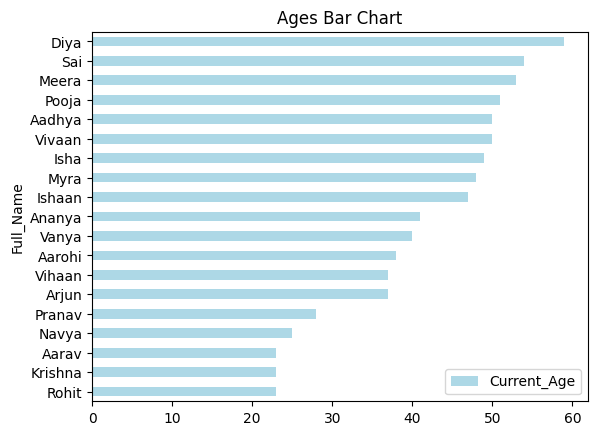

In [58]:
import matplotlib.pyplot as plt

# Sort the DataFrame df_xlx by 'Current_Age' in descending order
df_xlx_sorted = df_xlx.sort_values(by='Current_Age', ascending=True)

# Plotting the sorted horizontal bar chart
df_xlx_sorted.plot(
    kind='barh',
    x='Full_Name',  # Use 'Full_Name' for the x-axis (the names on the y-axis)
    y='Current_Age',
    title="Ages Bar Chart",
    color='#ADD8E6'  # Light Blue color
)
plt.show()
